<a href="https://colab.research.google.com/github/Shambhurajdesai/Mycodes/blob/main/startups_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/50_Startups.csv')
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
len(dataset)

50

In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.size

250

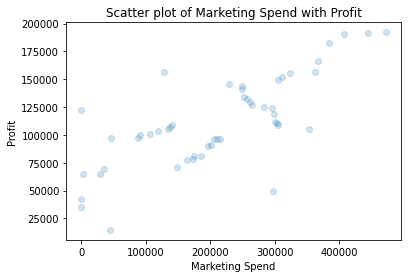

In [9]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha=0.199)
plt.title('Scatter plot of Marketing Spend with Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

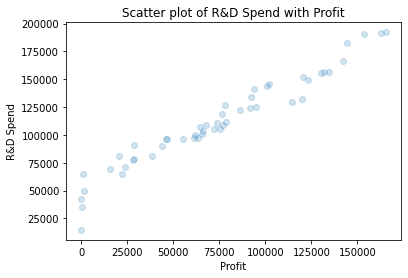

In [ ]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha=0.2)
plt.title('Scatter plot of R&D Spend with Profit')
plt.xlabel('Profit')
plt.ylabel('R&D Spend')
plt.show()

Text(0, 0.5, 'Profit')

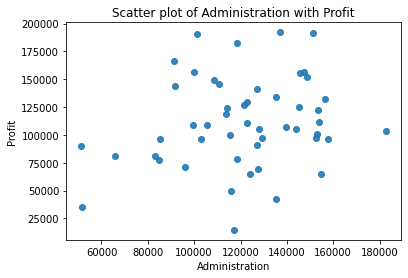

In [ ]:
plt.scatter(dataset['Administration'],dataset['Profit'],alpha=0.89)
plt.title('Scatter plot of Administration with Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

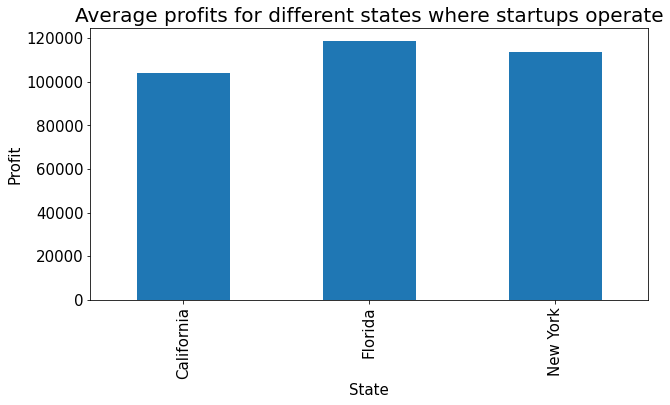

In [10]:
ax = dataset.groupby(dataset['State'])['Profit'].mean().plot.bar(
    figsize=(10,5),
    fontsize=15
)

ax.set_title('Average profits for different states where startups operate', fontsize = 20)
ax.set_xlabel('State',fontsize = 15)
ax.set_ylabel('Profit',fontsize = 15)

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
dataset['NewYork_state'] = np.where(dataset['State']=='New York',1,0)

#pd.get_dummies()

In [12]:
dataset['NewYork_state'] = np.where(dataset['State']=='New York',1,0)
dataset['California_state'] = np.where(dataset['State']=='California',1,0)
dataset['Florida_state'] = np.where(dataset['State']=='Florida',1,0)


dataset.drop(columns=['State'],axis=1,inplace=True)
# pd.get_dummies(dataset,columns=['State']).head(5)

In [ ]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [13]:
dependent_var = 'Profit'

In [14]:
independent_var = list(set(dataset.columns.tolist()) - {dependent_var})

In [15]:
independent_var

['California_state',
 'NewYork_state',
 'R&D Spend',
 'Florida_state',
 'Marketing Spend',
 'Administration']

In [16]:
X = dataset[independent_var].values

Y = dataset[dependent_var].values

In [17]:
dataset[independent_var]

,California_state,NewYork_state,R&D Spend,Florida_state,Marketing Spend,Administration
0,0,1,165349.20,0,471784.10,136897.80
1,1,0,162597.70,0,443898.53,151377.59
2,0,0,153441.51,1,407934.54,101145.55
3,0,1,144372.41,0,383199.62,118671.85
4,0,0,142107.34,1,366168.42,91391.77
5,0,1,131876.90,0,362861.36,99814.71
6,1,0,134615.46,0,127716.82,147198.87
7,0,0,130298.13,1,323876.68,145530.06
8,0,1,120542.52,0,311613.29,148718.95
9,1,0,123334.88,0,304981.62,108679.17


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
X[0:10]

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 0.0000000e+00,
        4.7178410e+05, 1.3689780e+05],
       [1.0000000e+00, 0.0000000e+00, 1.6259770e+05, 0.0000000e+00,
        4.4389853e+05, 1.5137759e+05],
       [0.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0000000e+00,
        4.0793454e+05, 1.0114555e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 0.0000000e+00,
        3.8319962e+05, 1.1867185e+05],
       [0.0000000e+00, 0.0000000e+00, 1.4210734e+05, 1.0000000e+00,
        3.6616842e+05, 9.1391770e+04],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 0.0000000e+00,
        3.6286136e+05, 9.9814710e+04],
       [1.0000000e+00, 0.0000000e+00, 1.3461546e+05, 0.0000000e+00,
        1.2771682e+05, 1.4719887e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.0000000e+00,
        3.2387668e+05, 1.4553006e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 0.0000000e+00,
        3.1161329e+05, 1.4871895e+05],
       [1.0000000e+00, 0.0000000e+00,

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train[0:10]

array([[0.        , 0.        , 0.33561668, 1.        , 0.45494286,
        0.48655174],
       [0.        , 1.        , 0.2782839 , 0.        , 0.43561799,
        0.3173015 ],
       [0.        , 0.        , 0.45557444, 1.        , 0.28413435,
        0.87258866],
       [1.        , 0.        , 0.2807759 , 0.        , 0.44680961,
        1.        ],
       [0.        , 0.        , 0.55488118, 1.        , 0.62511553,
        0.59103645],
       [0.        , 0.        , 0.7880179 , 1.        , 0.68649342,
        0.88568959],
       [0.        , 0.        , 0.72539353, 1.        , 0.54370828,
        0.98922572],
       [0.        , 1.        , 0.0060492 , 0.        , 0.0040356 ,
        0.6847981 ],
       [0.        , 1.        , 0.00327821, 0.        , 0.        ,
        0.00432296],
       [0.        , 1.        , 0.39676926, 0.        , 0.22709197,
        0.95618996]])

In [23]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
regressor.intercept_

44153.95466784864

In [26]:
regressor.coef_

array([ 8.66383692e+01,  7.86007422e+02,  1.27892182e+05, -8.72645791e+02,
        1.72720281e+04,  3.49927567e+03])

In [29]:
y_pred_train = regressor.predict(X_train)

In [30]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])